In [14]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [15]:
#Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
#plot
def plotImages(images):
        image = 1
        _, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
        for i in range(len(images)):
                #ax[i].axis('off')
                ax[i].set_title('Imagem ' + str(image))
                ax[i].imshow(images[i], cmap='gray')
                image += 1
        plt.show()

In [17]:
def edgeThinning(img, weak_th = None, strong_th = None):
	
	img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	
	gx = cv.Sobel(np.float32(img), cv.CV_32F, 1, 0, 3)
	gy = cv.Sobel(np.float32(img), cv.CV_32F, 0, 1, 3)
	
	mag, ang = cv.cartToPolar(gx, gy, angleInDegrees = True)
	
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	h, w = img.shape
	
	for i_x in range(w):
		for i_y in range(h):
			
			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			if w>neighb_1_x>= 0 and h>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if w>neighb_2_x>= 0 and h>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)			
	ids = np.zeros_like(img)
	
	for i_x in range(w):
		for i_y in range(h):
			
			grad_mag = mag[i_y, i_x]
			
			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2
	return mag

## 1. Carregar a imagem 'chips.png'.

O corte da imagem foi realizado para melhor vizualizar o vetor que indica a direção da borda

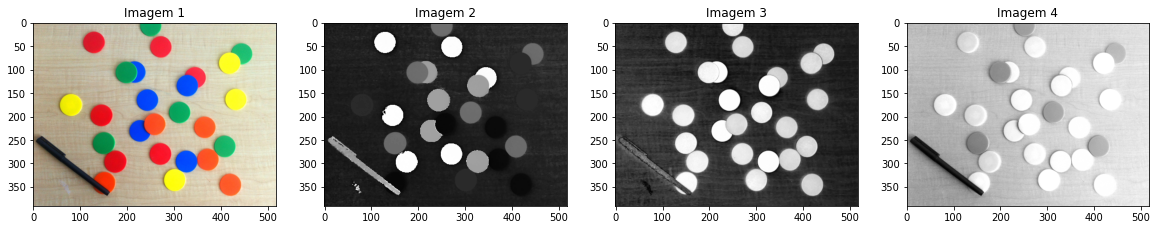

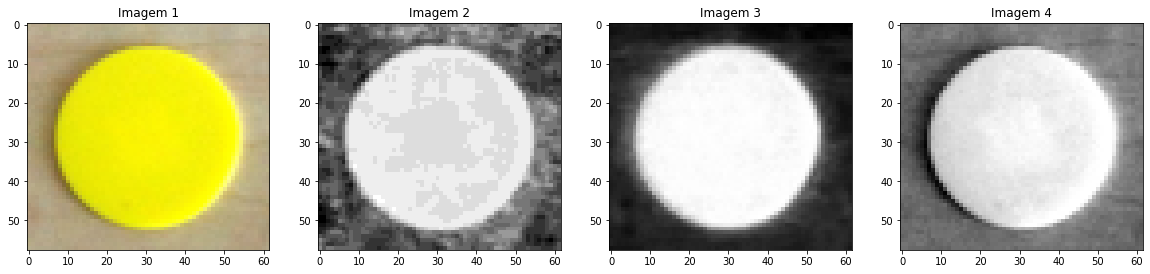

In [18]:
chips = cv.imread("chips.png") #Imagem em BGR
cchips = cv.imread("cropped-chips.png")

img_rgb_1 = cv.cvtColor(chips, cv.COLOR_BGR2RGB) #Imagem em RGB
img_hsv_1 = cv.cvtColor(chips, cv.COLOR_BGR2HSV) #Imagem em HSV
img_rgb_2 = cv.cvtColor(cchips, cv.COLOR_BGR2RGB)
img_hsv_2 = cv.cvtColor(cchips, cv.COLOR_BGR2HSV) 

H, S, V = cv.split(img_hsv_1) #Separando os canais 'H', 'S' e 'V'
h, s, v = cv.split(img_hsv_2)

#Resultado: Imagem Original/ canal H/ canal S/ canal V
result_1_1 = [img_rgb_1, H,S,V]
result_1_2 = [img_rgb_2, h,s,v]

plotImages(result_1_1)
plotImages(result_1_2)

## 2. Calcular o gradiente e mostrar uma imagem com os vetores sobrepostos à imagem 'chips.png', utilizando a função 'quiver'.

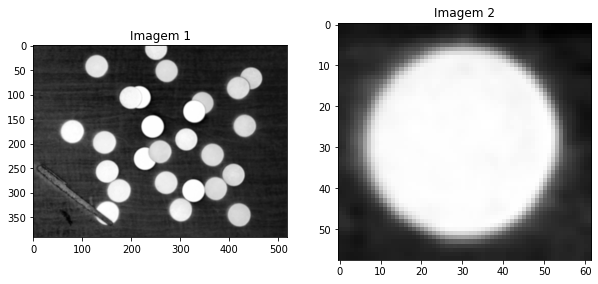

In [19]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])#Kernel para as bordas em X
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])#Kenel para as bordas em Y
s_kernel = np.ones((3,3),np.float32)/9          #Kernel pra suavização 

img_1 = cv.filter2D(S , 3 , s_kernel)           #Canal 'S' suavizado para melhor detecção das bordas
img_2 = cv.filter2D(s , 3 , s_kernel)

#Resultado: Canal S suavizado
resultado_2_1 = [img_1, img_2]
plotImages(resultado_2_1)

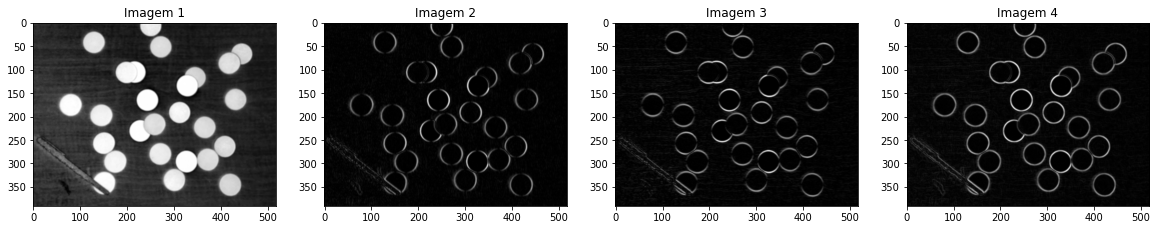

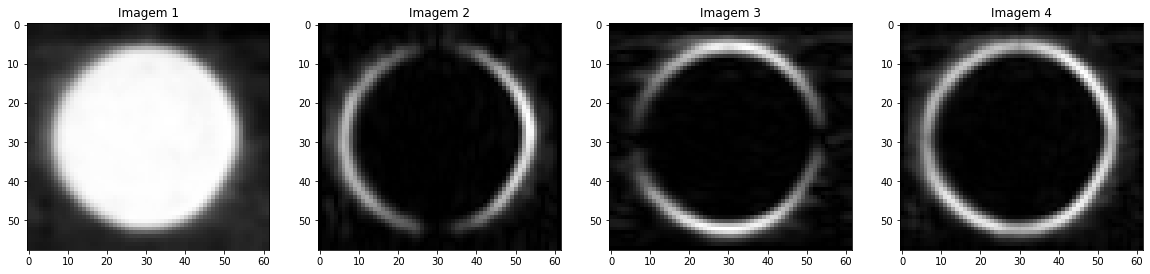

In [20]:
Gx =  cv.filter2D(img_1, -1, sobel_x) #Gradiente em X
Gy =  cv.filter2D(img_1, -1, sobel_y) #Gradiente em Y
Gt = np.abs(Gx) + np.abs(Gy)          #Gradiente total = |Gradiente em X| + |Gradiente em Y|

gx =  cv.filter2D(img_2, -1, sobel_x) 
gy =  cv.filter2D(img_2, -1, sobel_y) 
gt = np.abs(gx) + np.abs(gy)        

#Resultado: Canal S suavizado/ |Gradiente em X| / |Gradiente em Y| / |Gradiente em X| + |Gradiente em Y|
resultado_2_2 = [img_1, np.abs(Gx), np.abs(Gy), Gt]
resultado_2_3 = [img_2, np.abs(gx), np.abs(gy), gt]

plotImages(resultado_2_2)
plotImages(resultado_2_3)

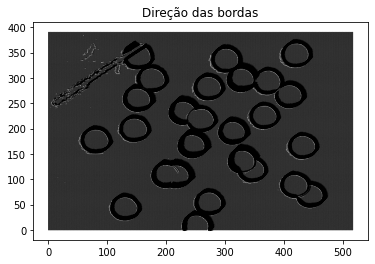

In [21]:
y_shape, x_shape = img_1.shape #Dimensões da imagem 'chips.png'

x = np.arange(0, x_shape, 1)
y = np.arange(0, y_shape, 1)
X, Y = np.meshgrid(x, y)

plt.title('Direção das bordas')
plt.quiver(X, Y, np.abs(Gx), np.abs(Gy)) #Direção das bordas

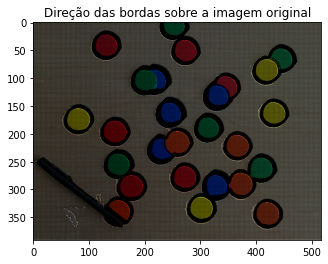

In [22]:
plt.title('Direção das bordas sobre a imagem original')
plt.quiver(X, Y, np.abs(Gx), np.abs(Gy)) #Direção das bordas
plt.imshow(img_rgb_1)                    #Direção das bordas sobre a imagem original

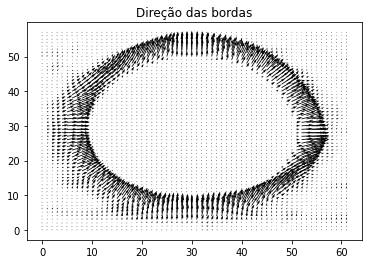

In [23]:
cy_shape, cx_shape = img_2.shape #Dimensões da imagem 'cropped-chips.png'

cx = np.arange(0, cx_shape, 1)
cy = np.arange(0, cy_shape, 1)
cX, cY = np.meshgrid(cx, cy)

plt.title('Direção das bordas')
plt.quiver(cX, cY, np.abs(gx), np.abs(gy)) #Direção das bordas

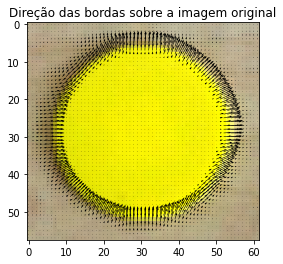

In [24]:
plt.title('Direção das bordas sobre a imagem original')
plt.quiver(cX, cY, np.abs(gx), np.abs(gy)) #Direção das bordas
plt.imshow(img_rgb_2)                      #Direção das bordas sobre a imagem original

## 3. Obter a magnitude do gradiente e limiarizá-la.

A magnitude do gradiente foi calculado na questão anterior.

Depois de calcular nossa representação de magnitude de gradiente, as  bordas ainda são bastante ruidozas e borradas, isso ocorre, pois deve haver apenas uma resposta de borda para uma determinada região, não um grupo inteiro de pixels se apresentando como bordas.

Para remediar isso, podemos aplicar afinamento de bordas usando supressão não máxima. Para aplicar a supressão não máxima, precisamos examinar a magnitude do gradiente $G$ e a orientação $\theta$ em cada pixel na imagem e:

Compare o pixel atual com a vizinhança $3 \times 3$ ao seu redor. Determine em qual direção a orientação está apontando:

Se estiver apontando para o norte ou para o sul, examine a magnitude norte e sul;

Se a orientação estiver apontando para leste ou oeste, examine os pixels leste e oeste;

Se a magnitude do pixel central for maior que os dois pixels com os quais está sendo comparado, preserve a magnitude; caso contrário, descarte-o;

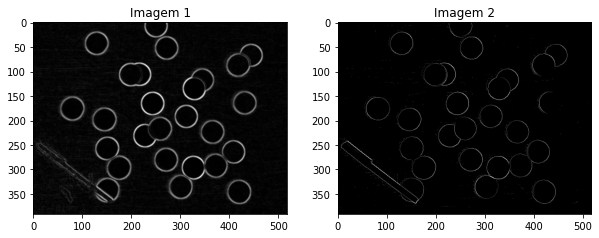

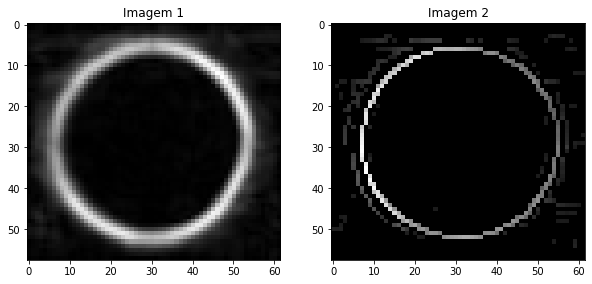

In [25]:
thinnedImage_1 = edgeThinning(chips) #bordas limiarizadas
thinnedImage_2 = edgeThinning(cchips) 

resultado_3_1 = [Gt, thinnedImage_1]
resultado_3_2 = [gt, thinnedImage_2]

plotImages(resultado_3_1)
plotImages(resultado_3_2)

## 4. Obter as bordas dos discos utilizando o algoritmo 'canny'.

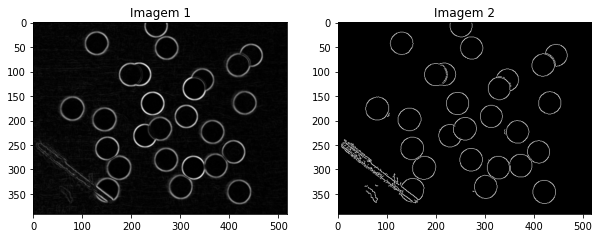

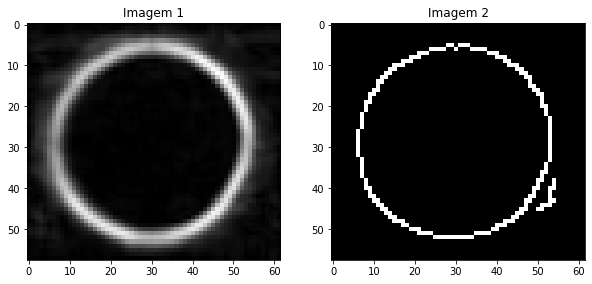

In [26]:
canny_1 = cv.Canny(S, 100, 200)
canny_2 = cv.Canny(s, 100, 200)

resultado_4_1 = [Gt, canny_1]
resultado_4_2 = [gt, canny_2]

plotImages(resultado_4_1)
plotImages(resultado_4_2)